In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('store_data.csv', header=None)
df = df.fillna(0)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,chicken,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7499,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_list = df.values.tolist()
df_list_transp = df.apply(lambda row: row.tolist(), axis=1)
df_list_transp.head()

0    [shrimp, almonds, avocado, vegetables mix, gre...
1    [burgers, meatballs, eggs, 0, 0, 0, 0, 0, 0, 0...
2    [chutney, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [turkey, avocado, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
4    [mineral water, milk, energy bar, whole wheat ...
dtype: object

In [4]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{0, 'toothpaste', 'green grapes', 'low fat yogurt', 'tomato juice', 'vegetables mix', 'zucchini', 'burgers', 'sandwich', 'babies food', 'nonfat milk', 'herb & pepper', 'chili', 'white wine', 'mint green tea', 'cottage cheese', 'salad', 'green beans', 'hot dogs', 'sparkling water', 'brownies', 'oatmeal', 'red wine', 'napkins', 'barbecue sauce', 'pancakes', 'french fries', 'fresh tuna', 'olive oil', 'magazines', 'light cream', 'cooking oil', 'tomato sauce', 'cake', 'bug spray', 'carrots', 'chocolate bread', 'chicken', 'strong cheese', 'pepper', 'oil', 'mayonnaise', 'milk', 'energy bar', 'avocado', 'ham', 'mushroom cream sauce', 'strawberries', 'fromage blanc', 'tea', 'hand protein bar', 'spaghetti', 'parmesan cheese', 'almonds', 'antioxydant juice', 'chocolate', 'cereals', 'butter', 'frozen smoothie', 'protein bar', 'flax seed', 'whole wheat rice', 'cookies', 'mashed potato', ' asparagus', 'pet food', 'grated cheese', 'shallot', 'bacon', 'candy bars', 'soup', 'whole weat flour', 'chutney

In [5]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

# ohe -> One-Hot-Encoded
ohe_df = pd.DataFrame(encoded_vals).drop(columns=0)

In [6]:
ohe_df.head()

,toothpaste,candy bars,soup,chutney,rice,frozen vegetables,zucchini,ground beef,pickles,muffins,...,energy drink,green tea,mineral water,cottage cheese,almonds,salad,antioxydant juice,frozen smoothie,olive oil,shrimp
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [7]:
freq_items = apriori(ohe_df, min_support=0.04, use_colnames=True, verbose=1, max_len=2)

rules = association_rules(freq_items, metric="confidence", min_threshold=0.09)

print("The number of rules produced is: ", len(rules))
rules

Processing 870 combinations | Sampling itemset size 2
The number of rules produced is:  10


/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672,0.561638
1,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
2,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
3,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
6,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
7,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
8,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
9,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


In [8]:
freq_items0 = apriori(ohe_df, min_support=0.01, use_colnames=True, verbose=1)

three_freq_items0 = freq_items0[freq_items0['itemsets'].apply(len)>=3]

rules0 = association_rules(three_freq_items0, metric="confidence", min_threshold=0.02, support_only=True)

print("The number of rules produced is: ", len(rules0))
rules0

Processing 72 combinations | Sampling itemset size 4
The number of rules produced is:  0


/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [9]:
freq_items10 = apriori(ohe_df, min_support=0.01, use_colnames=True, verbose=1)

three_freq_items10 = freq_items10[freq_items10['itemsets'].apply(len)>=3]

rules10 = association_rules(three_freq_items10, metric="confidence", min_threshold=0.016, support_only=True)

print("The number of rules produced is: ", len(rules10))
rules10

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 72 combinations | Sampling itemset size 4 3
The number of rules produced is:  6


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(mineral water, ground beef)",(spaghetti),NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
1,"(mineral water, spaghetti)",(ground beef),NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
2,"(spaghetti, ground beef)",(mineral water),NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
3,(mineral water),"(spaghetti, ground beef)",NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
4,(ground beef),"(mineral water, spaghetti)",NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
5,(spaghetti),"(mineral water, ground beef)",NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN


In [10]:
freq_items30 = apriori(ohe_df, min_support=0.01, use_colnames=True, verbose=1)

three_freq_items30 = freq_items30[freq_items30['itemsets'].apply(len)>=3]

rules30 = association_rules(three_freq_items30, metric="confidence", min_threshold=0.014, support_only=True)

print("The number of rules produced is: ", len(rules30))

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 72 combinations | Sampling itemset size 4 3
The number of rules produced is:  24


In [11]:
freq_items100 = apriori(ohe_df, min_support=0.01, use_colnames=True, verbose=1)

three_freq_items100 = freq_items100[freq_items100['itemsets'].apply(len)>=3]

rules100 = association_rules(three_freq_items100, metric="confidence", min_threshold=0.01, support_only=True)

print("The number of rules produced is: ", len(rules100))

Processing 5094 combinations | Sampling itemset size 3

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 72 combinations | Sampling itemset size 4
The number of rules produced is:  102


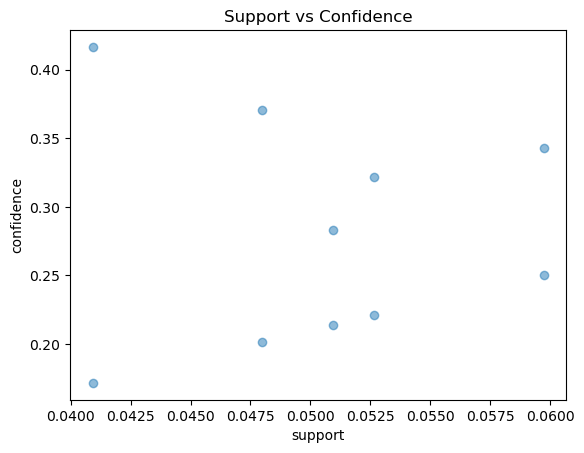

In [12]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

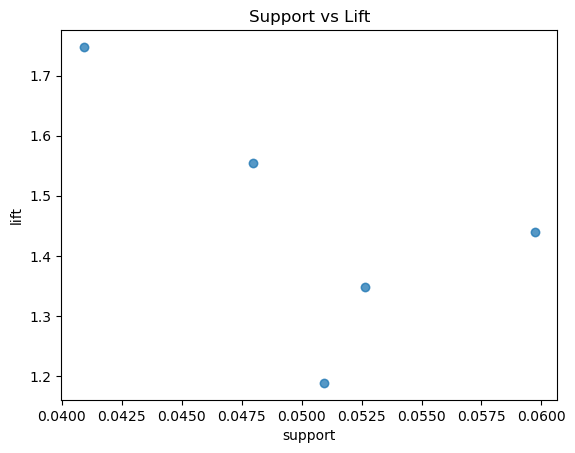

In [13]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

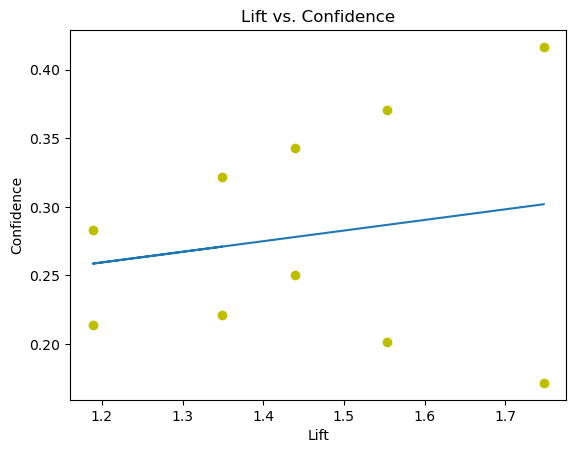

In [14]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
 fit_fn(rules['lift']))
plt.title('Lift vs. Confidence')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.show()

In [15]:
freq_items_fpg = fpgrowth(ohe_df, min_support=0.04, use_colnames=True, verbose=1, max_len=2)

print("The frequent itemsets are:")
print(freq_items_fpg)

rules_fpg = association_rules(freq_items_fpg, metric="confidence", min_threshold=0.09)

print("The number of rules produced is: ", len(rules_fpg))
rules_fpg

30 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (mineral water)
0 itemset(s) from tree conditioned on items (green tea)
0 itemset(s) from tree conditioned on items (low fat yogurt)
0 itemset(s) from tree conditioned on items (shrimp)
0 itemset(s) from tree conditioned on items (olive oil)
0 itemset(s) from tree conditioned on items (frozen smoothie)
0 itemset(s) from tree conditioned on items (honey)
0 itemset(s) from tree conditioned on items (salmon)
1 itemset(s) from tree conditioned on items (eggs)
0 itemset(s) from tree conditioned on items (burgers)
0 itemset(s) from tree conditioned on items (turkey)
1 itemset(s) from tree conditioned on items (milk)
0 itemset(s) from tree conditioned on items (whole wheat rice)
0 itemset(s) from tree conditioned on items (french fries)
0 itemset(s) from tree conditioned on items (soup)
1 itemset(s) from tree conditioned on items (spaghetti)
0 itemset(s) from tree conditioned on items (frozen vegetable

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
2,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
3,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
6,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
7,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
8,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672,0.561638
9,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369


In [16]:
freq_items_fpg0 = fpgrowth(ohe_df, min_support=0.01, use_colnames=True, verbose=1)

three_freq_items_fpg0 = freq_items_fpg0[freq_items_fpg0['itemsets'].apply(len)>=3]

rules_fpg0 = association_rules(three_freq_items_fpg0, metric="confidence", min_threshold=0.02, support_only=True)

print("The number of rules produced is: ", len(rules_fpg0))
rules_fpg0

75 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (mineral water)
5 itemset(s) from tree conditioned on items (green tea)
0 itemset(s) from tree conditioned on items (green tea, mineral water)
0 itemset(s) from tree conditioned on items (green tea, spaghetti)
0 itemset(s) from tree conditioned on items (green tea, french fries)
0 itemset(s) from tree conditioned on items (green tea, chocolate)
0 itemset(s) from tree conditioned on items (green tea, eggs)
7 itemset(s) from tree conditioned on items (low fat yogurt)
0 itemset(s) from tree conditioned on items (low fat yogurt, mineral water)
0 itemset(s) from tree conditioned on items (low fat yogurt, chocolate)
0 itemset(s) from tree conditioned on items (low fat yogurt, french fries)
0 itemset(s) from tree conditioned on items (low fat yogurt, eggs)
0 itemset(s) from tree conditioned on items (low fat yogurt, spaghetti)
0 itemset(s) from tree conditioned on items (low fat yogurt, milk)
0 itemset

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [17]:
freq_items_fpg10 = fpgrowth(ohe_df, min_support=0.01, use_colnames=True, verbose=1)

three_freq_items_fpg10 = freq_items_fpg10[freq_items_fpg10['itemsets'].apply(len)>=3]

rules_fpg10 = association_rules(three_freq_items_fpg10, metric="confidence", min_threshold=0.016, support_only=True)

print("The number of rules produced is: ", len(rules_fpg10))
rules_fpg10

75 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (mineral water)
5 itemset(s) from tree conditioned on items (green tea)
0 itemset(s) from tree conditioned on items (green tea, mineral water)
0 itemset(s) from tree conditioned on items (green tea, spaghetti)
0 itemset(s) from tree conditioned on items (green tea, french fries)
0 itemset(s) from tree conditioned on items (green tea, chocolate)
0 itemset(s) from tree conditioned on items (green tea, eggs)
7 itemset(s) from tree conditioned on items (low fat yogurt)
0 itemset(s) from tree conditioned on items (low fat yogurt, mineral water)
0 itemset(s) from tree conditioned on items (low fat yogurt, chocolate)
0 itemset(s) from tree conditioned on items (low fat yogurt, french fries)
0 itemset(s) from tree conditioned on items (low fat yogurt, eggs)
0 itemset(s) from tree conditioned on items (low fat yogurt, spaghetti)
0 itemset(s) from tree conditioned on items (low fat yogurt, milk)
0 itemset

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(mineral water, ground beef)",(spaghetti),NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
1,"(mineral water, spaghetti)",(ground beef),NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
2,"(spaghetti, ground beef)",(mineral water),NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
3,(mineral water),"(spaghetti, ground beef)",NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
4,(ground beef),"(mineral water, spaghetti)",NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN
5,(spaghetti),"(mineral water, ground beef)",NaN,NaN,0.017064,NaN,NaN,NaN,NaN,NaN


In [18]:
freq_items_fpg30 = fpgrowth(ohe_df, min_support=0.01, use_colnames=True, verbose=1)

three_freq_items_fpg30 = freq_items_fpg30[freq_items_fpg30['itemsets'].apply(len)>=3]

rules_fpg30 = association_rules(three_freq_items_fpg30, metric="confidence", min_threshold=0.014, support_only=True)

print("The number of rules produced is: ", len(rules_fpg30))
rules_fpg30

75 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (mineral water)
5 itemset(s) from tree conditioned on items (green tea)
0 itemset(s) from tree conditioned on items (green tea, mineral water)
0 itemset(s) from tree conditioned on items (green tea, spaghetti)
0 itemset(s) from tree conditioned on items (green tea, french fries)
0 itemset(s) from tree conditioned on items (green tea, chocolate)
0 itemset(s) from tree conditioned on items (green tea, eggs)
7 itemset(s) from tree conditioned on items (low fat yogurt)
0 itemset(s) from tree conditioned on items (low fat yogurt, mineral water)
0 itemset(s) from tree conditioned on items (low fat yogurt, chocolate)
0 itemset(s) from tree conditioned on items (low fat yogurt, french fries)
0 itemset(s) from tree conditioned on items (low fat yogurt, eggs)
0 itemset(s) from tree conditioned on items (low fat yogurt, spaghetti)
0 itemset(s) from tree conditioned on items (low fat yogurt, milk)
0 itemset

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(mineral water, milk)",(spaghetti),NaN,NaN,0.015731,NaN,NaN,NaN,NaN,NaN
1,"(mineral water, spaghetti)",(milk),NaN,NaN,0.015731,NaN,NaN,NaN,NaN,NaN
2,"(spaghetti, milk)",(mineral water),NaN,NaN,0.015731,NaN,NaN,NaN,NaN,NaN
3,(mineral water),"(spaghetti, milk)",NaN,NaN,0.015731,NaN,NaN,NaN,NaN,NaN
4,(milk),"(mineral water, spaghetti)",NaN,NaN,0.015731,NaN,NaN,NaN,NaN,NaN
5,(spaghetti),"(mineral water, milk)",NaN,NaN,0.015731,NaN,NaN,NaN,NaN,NaN
6,"(mineral water, eggs)",(spaghetti),NaN,NaN,0.014265,NaN,NaN,NaN,NaN,NaN
7,"(mineral water, spaghetti)",(eggs),NaN,NaN,0.014265,NaN,NaN,NaN,NaN,NaN
8,"(spaghetti, eggs)",(mineral water),NaN,NaN,0.014265,NaN,NaN,NaN,NaN,NaN
9,(mineral water),"(spaghetti, eggs)",NaN,NaN,0.014265,NaN,NaN,NaN,NaN,NaN


In [19]:
freq_items_fpg100 = fpgrowth(ohe_df, min_support=0.01, use_colnames=True, verbose=1)

three_freq_items_fpg100 = freq_items_fpg100[freq_items_fpg100['itemsets'].apply(len)>=3]

rules_fpg100 = association_rules(three_freq_items_fpg100, metric="confidence", min_threshold=0.01, support_only=True)

print("The number of rules produced is: ", len(rules_fpg100))
rules_fpg100

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


75 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (mineral water)
5 itemset(s) from tree conditioned on items (green tea)
0 itemset(s) from tree conditioned on items (green tea, mineral water)
0 itemset(s) from tree conditioned on items (green tea, spaghetti)
0 itemset(s) from tree conditioned on items (green tea, french fries)
0 itemset(s) from tree conditioned on items (green tea, chocolate)
0 itemset(s) from tree conditioned on items (green tea, eggs)
7 itemset(s) from tree conditioned on items (low fat yogurt)
0 itemset(s) from tree conditioned on items (low fat yogurt, mineral water)
0 itemset(s) from tree conditioned on items (low fat yogurt, chocolate)
0 itemset(s) from tree conditioned on items (low fat yogurt, french fries)
0 itemset(s) from tree conditioned on items (low fat yogurt, eggs)
0 itemset(s) from tree conditioned on items (low fat yogurt, spaghetti)
0 itemset(s) from tree conditioned on items (low fat yogurt, milk)
0 itemset

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(mineral water, olive oil)",(spaghetti),NaN,NaN,0.010265,NaN,NaN,NaN,NaN,NaN
1,"(mineral water, spaghetti)",(olive oil),NaN,NaN,0.010265,NaN,NaN,NaN,NaN,NaN
2,"(spaghetti, olive oil)",(mineral water),NaN,NaN,0.010265,NaN,NaN,NaN,NaN,NaN
3,(mineral water),"(spaghetti, olive oil)",NaN,NaN,0.010265,NaN,NaN,NaN,NaN,NaN
4,(olive oil),"(mineral water, spaghetti)",NaN,NaN,0.010265,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
97,"(mineral water, eggs)",(ground beef),NaN,NaN,0.010132,NaN,NaN,NaN,NaN,NaN
98,"(ground beef, eggs)",(mineral water),NaN,NaN,0.010132,NaN,NaN,NaN,NaN,NaN
99,(mineral water),"(ground beef, eggs)",NaN,NaN,0.010132,NaN,NaN,NaN,NaN,NaN
100,(ground beef),"(mineral water, eggs)",NaN,NaN,0.010132,NaN,NaN,NaN,NaN,NaN


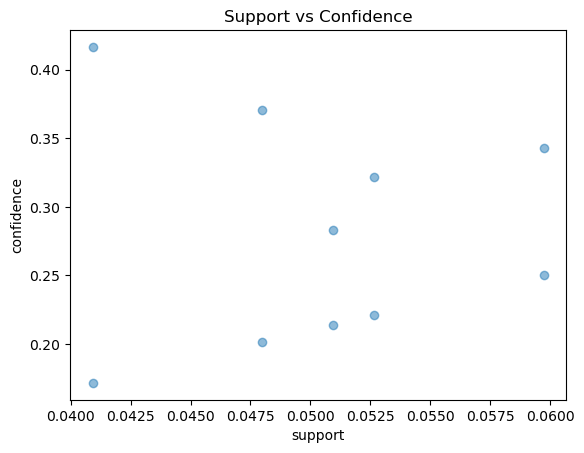

In [20]:
plt.scatter(rules_fpg['support'], rules_fpg['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

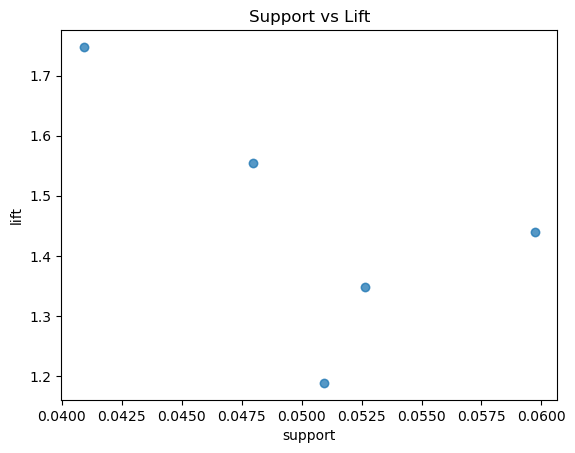

In [21]:
plt.scatter(rules_fpg['support'], rules_fpg['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

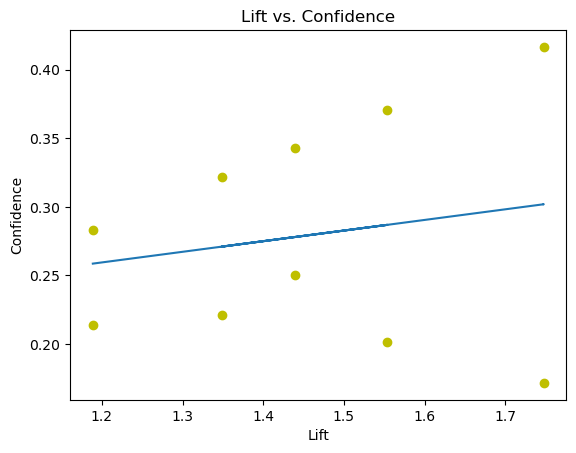

In [22]:
fit = np.polyfit(rules_fpg['lift'], rules_fpg['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules_fpg['lift'], rules_fpg['confidence'], 'yo', rules_fpg['lift'],
 fit_fn(rules_fpg['lift']))
plt.title('Lift vs. Confidence')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.show()

Same results but fpgrowth is more efficient 